# What makes people happy? Can you find Dytopia?

The `World Happiness Report` is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. Over the last year’s, `World Happiness Report` focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.

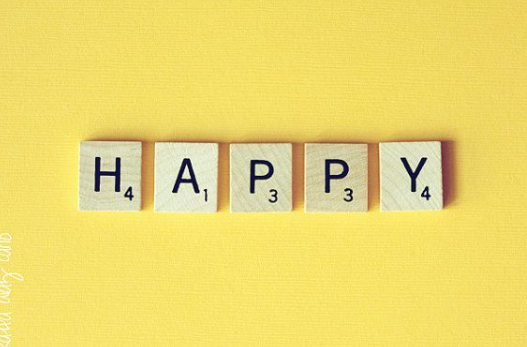


**Dataset information**

    The information in the datasets is based on answers to the most life evaluation address inquired within the survey. This address, known as the Cantril step, asks respondents to think of a step with the most excellent conceivable life for them being a 10 and the most exceedingly bad conceivable life being a and to rate their claim current lives on that scale. 


The Happiness Score is explained by the following factors:

- `Overall rank`: happiness rank of the different countries
- `Country o region`
- `Score`:  is a national average of the responses to the main life evaluation question asked in the Gallup World Poll (GWP), which uses the Cantril Ladder. Ranges from [0-10]
- `GDP per capita`
- `Healthy Life Expectancy`: score that goes from [0-1], being 1 the ones that have more confidence in terms of healthy life
- `Social support`: it indicates how people are appreciating the social support by governments, and it that ranges from [0-2]
- `Freedom to make life choices` score that ranges from 0 to 1, being 1 the ones that feel more free
- `Generosity`:score that ranges from 0 to 1, being 1 the ones that feel more generosity 
- `Perceptions of corruption`: perception of corruption on the country that it goes from  0 to 1. The higher this value is the lower perception of corruption 
- `year`  


>dataset: `Ex2.2._Happiness-Score.csv`

In [ ]:
!pip install plotly

In [ ]:
!pip install wordcloud

In [ ]:
import pandas as pd
pd.options.mode.chained_assignment = None

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from wordcloud import WordCloud
import plotly.express as px
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Exercise 1.Tell a story with your dataset, to try to answer the following question:

"Which factors are more important to live a happier life? As a result, people and countries can focus on the more significant factors to achieve a higher happiness level "

# To achieve this goal use the different funcionalities from 
# the visualization libraries that you have seen in the module

In [ ]:
missing_values = ['/','na','nul','null','-','?']
data = pd.read_csv('Ex2.2._Happiness-Score.csv', na_values = missing_values)
data.head()

In [ ]:
df = data.copy()
df

In [ ]:
df.isin(['?']).sum()

In [ ]:
data.shape
df.shape

In [ ]:
df.info()

In [ ]:
df.duplicated().sum()

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.isnull().sum()/len(df)*100

In [ ]:
sns.set(rc={'figure.figsize':(10, 5)})

sns.heatmap(df.isna(),cmap='viridis', yticklabels=False)
plt.show()

In [ ]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.drop('Unnamed: 0.1', axis=1, inplace=True)
df.drop('Healthy life expectancy', axis=1, inplace=True)

In [ ]:
df = df.fillna(df.median())

In [ ]:
df['Perceptions of corruption'].isnull().sum()

In [ ]:
sns.set(rc={'figure.figsize':(10, 5)})

sns.heatmap(df.isna(),cmap='viridis', yticklabels=False)
plt.show()

In [ ]:
df.head()

In [ ]:
import sys
sys.path.insert(0, 'Functions_EDA.py')

from Functions_EDA import *

In [ ]:
df['year'].unique()

In [ ]:
df['year'].value_counts()

In [ ]:
y_2018 = df[df['year'] == 2018]
y_2018

Let's analyze the year 2018.

In [ ]:
sns.boxplot(data = y_2018.loc[:, ['Score','GDP per capita','Social support','Freedom to make life choices','Generosity', 'Perceptions of corruption']])


In [ ]:
OutLiersBox(y_2018, 'Score')

In [ ]:
OutLiersBox(y_2018, 'GDP per capita')

In [ ]:
outliers_GDP_2018 = y_2018[y_2018['GDP per capita'] > 1.649]
outliers_GDP_2018

In [ ]:
px.bar(outliers_GDP_2018, x = 'Country or region', y = ['GDP per capita', 'Social support','Freedom to make life choices', 'Generosity', 'Perceptions of corruption'],
      color_discrete_sequence = ['goldenrod','red','darkcyan','hotpink','grey'],
       title = 'Outliers in GDP per capita in 2018',
      barmode = 'group')

We can see that United Arab Emirates, although it has a high GDP per capita score, scored really low in the rest of the variables.

In [ ]:
OutLiersBox(y_2018, 'Social support')

In [ ]:
outliers_social_support_2018 = y_2018[y_2018['Social support'] < 0.474]
outliers_social_support_2018

In [ ]:
fig = px.bar(outliers_social_support_2018, x = 'Country or region', y = ['GDP per capita', 'Social support','Freedom to make life choices', 'Generosity', 'Perceptions of corruption'],
      color_discrete_sequence = ['goldenrod','red','darkcyan','hotpink','grey'],
       title = 'Outliers in social support in 2018',
      barmode = 'group')
fig.show()

Benin, Syria, and the Central African Republic scored really low in social support. Benin scored low in GDP per capita as well, Syria scored high in GDP per capita, whereas we don't have any score for the GDP per capita in the Central African Republic.

In [ ]:
OutLiersBox(y_2018, 'Freedom to make life choices')

In [ ]:
outliers_freedom_2018 = y_2018[y_2018['Freedom to make life choices'] < 0.025]
outliers_freedom_2018

In [ ]:
fig = px.bar(outliers_freedom_2018, x = 'Country or region', y = ['GDP per capita', 'Social support','Freedom to make life choices', 'Generosity', 'Perceptions of corruption'],
      color_discrete_sequence = ['goldenrod','red','darkcyan','hotpink','grey'],
       title = 'Outliers in freedom to make life choices in 2018',
      barmode = 'group')
fig.show()

We can see that Sudan scored extremely low in freedom to make life choices, whereas we don't have any score for Angola.

In [ ]:
OutLiersBox(y_2018, 'Generosity')

In [ ]:
outliers_generosity_2018 = y_2018[y_2018['Generosity'] > 0.392]
outliers_generosity_2018

In [ ]:
fig = px.bar(outliers_generosity_2018, x = 'Country or region', y = ['GDP per capita', 'Social support','Freedom to make life choices', 'Generosity', 'Perceptions of corruption'],
      color_discrete_sequence = ['goldenrod','red','darkcyan','hotpink','grey'],
       title = 'Outliers in generosity in 2018',
      barmode = 'group')
fig.show()

Both Indonesia and Myammar scored high in generosity and they also scored pretty high in social support as well. However, they scored low in GDP per capita and extremely low in perceptions of corruption.

In [ ]:
OutLiersBox(y_2018, 'Perceptions of corruption')

In [ ]:
outliers_corruption_2018 = y_2018[y_2018['Perceptions of corruption'] > 0.259]
outliers_corruption_2018

In [ ]:
fig = px.bar(outliers_corruption_2018, x = 'Country or region', y = ['GDP per capita', 'Social support','Freedom to make life choices', 'Generosity', 'Perceptions of corruption'],
      color_discrete_sequence = ['goldenrod','red','darkcyan','hotpink','grey'],
       title = 'Outliers in perceptions of corruption in 2018',
      barmode = 'group')
fig.show()

These are the countries which had a high score in perceptions of corruption in 2018, meaning that corruption was less perceived in these countries. Most of them scored high in GDP per capita and social support, with a few exceptions. Let's verify.

In [ ]:
outliers_corruption_2018 = outliers_corruption_2018.sort_values(by='Score',ascending=False)
outliers_corruption_2018

In [ ]:
fig = px.bar(outliers_corruption_2018,x='Country or region',y='Score')
fig.show()

In [ ]:
corrCoef_Threshold(outliers_corruption_2018)

From the first plot, we saw that most contries that constitute an outlier for perceptions of corruption in 2018 scored high in GDP per capita and social support. From the matrix, we can confirm that GDP per capita and social support have contributed to the total score for this countries. From the second bar plot, we can see a certain continuitiy whic starts to dicrease with Ireland and then drop with Singapore. Let's analyze those countries with a lower score but a high perception of corruption.

In [ ]:
outliers_corruption_2018.loc[outliers_corruption_2018['Country or region'] == 'Ireland']

In [ ]:
corruption_2018_toanalyze = outliers_corruption_2018.loc[outliers_corruption_2018['Score'] <= 6.977]
corruption_2018_toanalyze

In [ ]:
fig = px.bar(corruption_2018_toanalyze, x = 'Country or region', y = ['GDP per capita', 'Social support','Freedom to make life choices', 'Generosity', 'Perceptions of corruption'],
      color_discrete_sequence = ['goldenrod','red','darkcyan','hotpink','grey'],
       title = 'Outliers in perceptions of corruption in 2018 to analyze',
      barmode = 'group')
fig.show()

From this plot and from the table above, we can see that countries like Ireland, Germany, Luxembourg, and Israel scored quite high in GDP per capita and social support, which led them in the top 20 happiest countries. Israel and Hong Kong scored lower in freedom to make life choices, Luxembourg and Singapore scored low in generosity, Somalia didn't have any score for GDP per capita and scored really low in social support, whereas Rwanda scored extremely low in GDP per capita and social support.

Let's have a look at some correlations.

In [ ]:
corrCoef_Threshold(y_2018)

From this matrix, it seems that in 2018 GDP per capita and social support had a higher impact on the overall happiness score. Freedom to make life choices seemd to have a moderate impact, followed by perceptions of corruption. Generosity barely had any impact on the overall happiness score. Let's have a closer look.

In [ ]:
sns.lmplot(x='Score', y='GDP per capita', data=y_2018)

In [ ]:
sns.lmplot(x='Score', y='Social support', data=y_2018)

In [ ]:
sns.lmplot(x='Score', y='Freedom to make life choices', data=y_2018)

In [ ]:
sns.lmplot(x='Score', y='Generosity', data=y_2018)

In [ ]:
sns.lmplot(x='Score', y='Perceptions of corruption', data=y_2018)

In [ ]:
sns.pairplot(y_2018, vars = ['Score','GDP per capita','Social support','Freedom to make life choices','Generosity','Perceptions of corruption'])

These scatter plots confirm what we found in the matrix: there is a positive correlation between the overall happiness score and GDP per capita, social suppport and freedom to make life choices and perceptions of corruption. GDP per capita and social support have the strongest correlation. Generosity barely had any impact.

Let's analyze 2019

In [ ]:
y_2019 = df[df['year'] == 2019]
y_2019

In [ ]:
sns.boxplot(data = y_2019.loc[:, ['GDP per capita','Social support','Freedom to make life choices','Generosity', 'Perceptions of corruption']])

In [ ]:
OutLiersBox(y_2019, 'GDP per capita')

In [ ]:
OutLiersBox(y_2019, 'Social support')

In [ ]:
outliers_social_support_2019 = y_2019.loc[df['Social support'] < 0.517]
outliers_social_support_2019

In [ ]:
fig = px.bar(outliers_social_support_2019, x = 'Country or region', y = ['GDP per capita', 'Social support','Freedom to make life choices', 'Generosity', 'Perceptions of corruption'],
      color_discrete_sequence = ['goldenrod','red','darkcyan','hotpink','grey'],
       title = 'Outliers in social support in 2019',
      barmode = 'group')
fig.show()

Benin, Burundi, and Syria scored really low in social support. Whereas we don't have any score in social support for the Central African Republic.

In [ ]:
OutLiersBox(y_2019, 'Freedom to make life choices')

In [ ]:
outliers_freedom_2019 = y_2019[y_2019['Freedom to make life choices'] < 0.01]
outliers_freedom_2019

In [ ]:
px.bar(outliers_freedom_2019, x = 'Country or region', y = ['GDP per capita', 'Social support','Freedom to make life choices', 'Generosity', 'Perceptions of corruption'],
      color_discrete_sequence = ['goldenrod','red','darkcyan','hotpink','grey'],
       title = 'Outliers in freedom to make life choices in 2019',
      barmode = 'group')

Afghanistan had no score in freedom to make life choices in 2019.

In [ ]:
OutLiersBox(y_2019, 'Generosity')

In [ ]:
outliers_generosity_2019 = y_2019[y_2019['Generosity'] > 0.419]
outliers_generosity_2019

In [ ]:
px.bar(outliers_generosity_2019, x = 'Country or region', y = ['GDP per capita', 'Social support','Freedom to make life choices', 'Generosity', 'Perceptions of corruption'],
      color_discrete_sequence = ['goldenrod','red','darkcyan','hotpink','grey'],
       title = 'Outliers in generosity in 2019',
      barmode = 'group')

Indonesia and Myanmar scored high in generosity but low in GDP per capita and perceptions of corruption.

In [ ]:
OutLiersBox(y_2019, 'Perceptions of corruption')

In [ ]:
outliers_corruption_2019 = y_2019[y_2019['Perceptions of corruption'] > 0.278]
outliers_corruption_2019

In [ ]:
px.bar(outliers_corruption_2019, x = 'Country or region', y = ['GDP per capita', 'Social support','Freedom to make life choices', 'Generosity', 'Perceptions of corruption'],
      color_discrete_sequence = ['goldenrod','red','darkcyan','hotpink','grey'],
       title = 'Outliers in perceptions of corruption in 2019',
      barmode = 'group')

Like for 2018, in 2019 we had some countries that scored high in perceptions of corruption and that mostly scored high in GDP per capita and social support too. Let' take a closer look.

In [ ]:
outliers_corruption_2019 = outliers_corruption_2019.sort_values(by='Score',ascending=False)
outliers_corruption_2019

In [ ]:
px.bar(outliers_corruption_2019, x='Country or region',y='Score')

We can observe a progressive decline in the total score and a drop at Singapore.

In [ ]:
outliers_corruption_2019.loc[outliers_corruption_2019['Country or region'] == 'Singapore']

In [ ]:
corruption_2019_toanalyze = outliers_corruption_2019.loc[outliers_corruption_2019['Score'] <= 6.262]
corruption_2019_toanalyze

In [ ]:
px.bar(corruption_2019_toanalyze, x = 'Country or region', y = ['GDP per capita', 'Social support','Freedom to make life choices', 'Generosity', 'Perceptions of corruption'],
      color_discrete_sequence = ['goldenrod','red','darkcyan','hotpink','grey'],
       title = 'Outliers in perceptions of corruption in 2019 to analyze',
      barmode = 'group')

We can see that Hong Kong scored quite high in GDP per capita but extremely low in freedom to make life choices and generosity. Rwanda scored extremely low in GDP per capita and social support.

Let's have a look at some correlations.

In [ ]:
corrCoef_Threshold(y_2019)

Like in 2018, GDP per capita and social support had a higher impact on the overall happiness score. Freedom to make life choices had a moderate impact, whereas perceptions of corruptions impacted less compared to 2018. Let's explore more deeply.

In [ ]:
sns.lmplot(x='Score', y='GDP per capita', data=y_2019)

In [ ]:
sns.lmplot(x='Score', y='Social support', data=y_2019)

In [ ]:
sns.lmplot(x='Score', y='Freedom to make life choices', data=y_2019)

In [ ]:
sns.lmplot(x='Score', y='Generosity', data=y_2019)

In [ ]:
sns.lmplot(x='Score', y='Perceptions of corruption', data=y_2019)

In [ ]:
sns.pairplot(y_2019, vars = ['Score','GDP per capita','Social support','Freedom to make life choices','Generosity','Perceptions of corruption'])

Once again, we can see that GDP per capita and social support had the strongest and more positve correlation with the total happiness score. Freedom to make life choices impacted moderately. Perceptions of corruption contributed only minimally, whereas generosity barely had any impact on the overall total score.

Let's analyze the 10 happiest countries in 2018 and then in 2019.

In [ ]:
top_2018 = y_2018.head(10)
top_2018

In [ ]:
px.bar(top_2018,x='Country or region', y = ['GDP per capita','Social support','Freedom to make life choices','Generosity','Perceptions of corruption'],
      color_discrete_sequence = ['goldenrod','red','darkcyan','hotpink','grey'],
       title = 'Top 10 happiest countries in 2018',
      barmode = 'group')

What made these countries happy?

In [ ]:
corrCoef_Threshold(top_2018)

Interestingly, unlike for the general score, GDP per capita and social support had a really small impact on the overall score. What seemed to have a higher impact was the freedom to make life choices. Let's explore.

Are the countries with the highest GDP per capita the happiest ones?

In [ ]:
high_GDP_2018 = y_2018[['Country or region','Score','GDP per capita','Social support','Freedom to make life choices','Generosity', 'Perceptions of corruption', 'year']].sort_values(by='GDP per capita',ascending=False).head(10)
high_GDP_2018

In [ ]:
px.bar(high_GDP_2018,x='Country or region', y = ['GDP per capita','Social support','Freedom to make life choices','Generosity','Perceptions of corruption'],
      color_discrete_sequence = ['goldenrod','red','darkcyan','hotpink','grey'],
       title = 'Top 10 countries with a higher GDP per capita in 2018',
      barmode = 'group')

In [ ]:
common_top_GDP_2018 = high_GDP_2018.loc[high_GDP_2018['Country or region'].isin(top_2018['Country or region'])].copy()
common_top_GDP_2018

Only Norway and Switzerland belong in the top 10 happiest countries. What about the remaining 8?

In [ ]:
high_GDP_not_top_2018 = high_GDP_2018.loc[~high_GDP_2018['Country or region'].isin(top_2018['Country or region'])].copy()
high_GDP_not_top_2018

In [ ]:
px.bar(high_GDP_not_top_2018,x='Country or region', y = ['GDP per capita','Social support','Freedom to make life choices','Generosity','Perceptions of corruption'],
      color_discrete_sequence = ['goldenrod','red','darkcyan','hotpink','grey'],
       title = 'Countries with a high GDP per capita but not in the top 10 happiest countries in 2018',
      barmode = 'group')

We can see that United Arab Emirates scored extremely high in GDP per capita but extremely low in social support, freedom to make life choices, generosity and perceptions of corruption. Qatar didn't score quite high in social support. Kuwait and Hong Kong scored pretty low in social support, and Kuwait also socred low in generosity and perceptions of corruption. Singapore scored a little bit lower in generosity. Luxembourg, Ireland, and the United States scored quite high but not enough to get them into the top 10 happiest countries.

In [ ]:
px.choropleth(high_GDP_2018, locations='Country or region',
             locationmode='country names',
             title = 'Top 10 countries with highest GDP per capita in 2018',
             color='Score')

In [ ]:
px.choropleth(top_2018, locations='Country or region',
             locationmode='country names',
             title = 'Top 10 happiest countries in 2018',
             color='Score')

As seen in these two maps, the countries with a higher GDP per capita aren't necessarily the happiest ones.

Let's take a closer look at social support.

In [ ]:
high_socialsupport_2018 = y_2018[['Country or region','Score','GDP per capita','Social support','Freedom to make life choices','Generosity', 'Perceptions of corruption', 'year']].sort_values(by='Social support',ascending=False).head(10)
high_socialsupport_2018

In [ ]:
px.bar(high_socialsupport_2018,x='Country or region', y = ['GDP per capita','Social support','Freedom to make life choices','Generosity','Perceptions of corruption'],
      color_discrete_sequence = ['goldenrod','red','darkcyan','hotpink','grey'],
       title = 'Top 10 countries with a higher social support in 2018',
      barmode = 'group')

In [ ]:
common_top_socialsupport_2018 = high_socialsupport_2018.loc[high_socialsupport_2018['Country or region'].isin(top_2018['Country or region'])].copy()
common_top_socialsupport_2018

In [ ]:
len(common_top_socialsupport_2018)

7 countries in the top 10 countries with a higher social support also belong to the top 10 happiest countries. What about the remaining 3 countries?

In [ ]:
high_socialsupport_not_top_2018 = high_socialsupport_2018.loc[~high_socialsupport_2018['Country or region'].isin(top_2018['Country or region'])].copy()
high_socialsupport_not_top_2018

In [ ]:
px.bar(high_socialsupport_not_top_2018,x='Country or region', y = ['GDP per capita','Social support','Freedom to make life choices','Generosity','Perceptions of corruption'],
      color_discrete_sequence = ['goldenrod','red','darkcyan','hotpink','grey'],
       title = 'Top 10 countries with a higher social support but not among the 10 happiest countries in 2018',
      barmode = 'group')

Uzbekistan scored extremely low in GDP per capita, Ireland scored quite loq in generosity and perceptions of corruption, whereas Israels scored quite low in freedom to make life choices, generosity and perceptions of corruption.

In [ ]:
px.choropleth(high_socialsupport_2018, locations='Country or region',
             locationmode='country names',
             title = 'Top 10 countries with the highest social support in 2018',
             color='Score')

In [ ]:
px.choropleth(top_2018, locations='Country or region',
             locationmode='country names',
             title = 'Top 10 happiest countries in 2018',
             color='Score')

Social support had an impact but alone wasn't enough. Let's take a look at freedom to make life choices.

In [ ]:
high_freedom_2018 = y_2018[['Country or region','Score','GDP per capita','Social support','Freedom to make life choices','Generosity', 'Perceptions of corruption', 'year']].sort_values(by='Freedom to make life choices',ascending=False).head(10)
high_freedom_2018

In [ ]:
px.bar(high_freedom_2018, x = 'Country or region', y = ['GDP per capita', 'Social support','Freedom to make life choices', 'Generosity', 'Perceptions of corruption'],
      color_discrete_sequence = ['goldenrod','red','darkcyan','hotpink','grey'],
       title = 'Top 10 countries with the highest freedom to make life choices in 2018',
      barmode = 'group')

In [ ]:
common_top_freedom_2018 = high_freedom_2018.loc[high_freedom_2018['Country or region'].isin(top_2018['Country or region'])].copy()
common_top_freedom_2018

In [ ]:
len(common_top_freedom_2018)

7 of the countries with a higher freedom to make life choices also belong to the top 10 happiest countries. What about the remaining 3 countries?

In [ ]:
high_freedom_not_top_2018 = high_freedom_2018.loc[~high_freedom_2018['Country or region'].isin(top_2018['Country or region'])].copy()
high_freedom_not_top_2018

In [ ]:
px.bar(high_freedom_not_top_2018, x = 'Country or region', y = ['GDP per capita', 'Social support','Freedom to make life choices', 'Generosity', 'Perceptions of corruption'],
      color_discrete_sequence = ['goldenrod','red','darkcyan','hotpink','grey'],
       title = 'Countries with a high freedom to make life choices but not among the top 10 happiest countries in 2018',
      barmode = 'group')

Uzbekistan scored low in GDP per capita, whereas Cambodia and Somalia scored low in social support. Moreover, we don't have any score for Somalia's GDP per capita in 2018.

In [ ]:
px.choropleth(high_freedom_2018, locations='Country or region',
             locationmode='country names',
             title = 'Top 10 countries with a high freedom to make life choices in 2018',
             color='Score')

In [ ]:
px.choropleth(top_2018, locations='Country or region',
             locationmode='country names',
             title = 'Top 10 happiest countries in 2018',
             color='Score')

In 2018, freedom to make life choices seemed to have a important impact, but alone it wasn't enough to determine the overall happiness of a country.

Let's take a look at the top 10 happiest countries in 2019.

In [ ]:
top_2019 = y_2019.head(10)
top_2019

In [ ]:
px.bar(top_2019, x = 'Country or region', y = ['GDP per capita', 'Social support','Freedom to make life choices', 'Generosity', 'Perceptions of corruption'],
      color_discrete_sequence = ['goldenrod','red','darkcyan','hotpink','grey'],
       title = 'Top 10 happiest countries in 2019',
      barmode = 'group')

What made these countries happy?

In [ ]:
corrCoef_Threshold(top_2019)

In 2019, social support and freedom to make life choices seemed to have impacted more on the overall happiness score. Perceptions of corruption seemed to have had a slightly moderate impact, whereas GDP per capita didn't seem to impact the overall score at all. Let's take a closer look.

In [ ]:
high_GDP_2019 = y_2019[['Country or region','Score','GDP per capita','Social support','Freedom to make life choices','Generosity', 'Perceptions of corruption', 'year']].sort_values(by='GDP per capita',ascending=False).head(10)
high_GDP_2019

In [ ]:
px.bar(high_GDP_2019,x='Country or region', y = ['GDP per capita','Social support','Freedom to make life choices','Generosity','Perceptions of corruption'],
      color_discrete_sequence = ['goldenrod','red','darkcyan','hotpink','grey'],
       title = 'Top 10 countries with a higher GDP per capita in 2019',
      barmode = 'group')

In [ ]:
common_top_GDP_2019 = high_GDP_2019.loc[high_GDP_2019['Country or region'].isin(top_2019['Country or region'])].copy()
common_top_GDP_2019

Only two countries belong to the top 10 happiest countries in 2019. What about the remaining 8 countries?

In [ ]:
high_GDP_not_top_2019 = high_GDP_2019.loc[~high_GDP_2019['Country or region'].isin(top_2019['Country or region'])].copy()
high_GDP_not_top_2019

In [ ]:
px.bar(high_GDP_not_top_2019,x='Country or region', y = ['GDP per capita','Social support','Freedom to make life choices','Generosity','Perceptions of corruption'],
      color_discrete_sequence = ['goldenrod','red','darkcyan','hotpink','grey'],
       title = 'Countries with a higher GDP per capita but not among the top 10 in 2019',
      barmode = 'group')

Qatar didn't score that high in social support and it scored quite low in perceptions of corruption. Luxembourg scored quite low in generosity, Singapore and Ireland seemed to have quite high scores but not enough to enter the top 10, the United Arab Emirates score lower in social support and in perceptions of corruption, Kuwait scored lower in social support, perceptions of corruption and generosity, Hong Kong scored a bit lower in social support and in freedom to make life choices, and the United States scored lower in freedom to make life choices and perceptions of corruption.

In [ ]:
px.choropleth(high_GDP_2019, locations='Country or region',
             locationmode='country names',
             title = 'Top 10 countries with a higher GDP per capita in 2019',
             color='Score')

In [ ]:
px.choropleth(top_2019, locations='Country or region',
             locationmode='country names',
             title = 'Top 10 happiest countries in 2019',
             color='Score')

GDP on its own, once again, is not enough to determine a country's overall level of happiness.

Let's explore social support.

In [ ]:
high_socialsupport_2019 = y_2019[['Country or region','Score','GDP per capita','Social support','Freedom to make life choices','Generosity', 'Perceptions of corruption', 'year']].sort_values(by='Social support',ascending=False).head(10)
high_socialsupport_2019

In [ ]:
px.bar(high_socialsupport_2019,x='Country or region', y = ['GDP per capita','Social support','Freedom to make life choices','Generosity','Perceptions of corruption'],
      color_discrete_sequence = ['goldenrod','red','darkcyan','hotpink','grey'],
       title = 'Top 10 countries with a higher social support in 2019',
      barmode = 'group')

In [ ]:
common_top_socialsupport_2019 = high_socialsupport_2019.loc[high_socialsupport_2019['Country or region'].isin(top_2019['Country or region'])].copy()
common_top_socialsupport_2019

5 countries belong to the top 10 happiest countries. What about the remaining 5 countries?

In [ ]:
high_socialsupport_not_top_2019 = high_socialsupport_2019.loc[~high_socialsupport_2019['Country or region'].isin(top_2019['Country or region'])].copy()
high_socialsupport_not_top_2019

In [ ]:
px.bar(high_socialsupport_not_top_2019,x='Country or region', y = ['GDP per capita','Social support','Freedom to make life choices','Generosity','Perceptions of corruption'],
      color_discrete_sequence = ['goldenrod','red','darkcyan','hotpink','grey'],
       title = 'Countries with a higher social support but not among the top 10 in 2019',
      barmode = 'group')

Ireland, Australia, and the United Kingdom seemed to have scored quite high, but apparently not enough to enter the top 10. Turkmenistan and Mongolia scored low in GDP per capita and freedom to make life choices and extremely low in perceptions of corruption.

In [ ]:
px.choropleth(high_socialsupport_2019, locations='Country or region',
             locationmode='country names',
             title = 'Top 10 countries with a social support in 2019',
             color='Score')

In [ ]:
px.choropleth(top_2019, locations='Country or region',
             locationmode='country names',
             title = 'Top 10 happiest countries in 2019',
             color='Score')

Even in 2019, social support on its own contributed to the overall happiness score but wasn't enough. It seems to have countributed even less compared to 2018.

Let's analyze freedom to make life choices.

In [ ]:
high_freedom_2019 = y_2019[['Country or region','Score','GDP per capita','Social support','Freedom to make life choices','Generosity', 'Perceptions of corruption', 'year']].sort_values(by='Freedom to make life choices',ascending=False).head(10)
high_freedom_2019

In [ ]:
px.bar(high_freedom_2019,x='Country or region', y = ['GDP per capita','Social support','Freedom to make life choices','Generosity','Perceptions of corruption'],
      color_discrete_sequence = ['goldenrod','red','darkcyan','hotpink','grey'],
       title = 'Top 10 countries with a higher freedom to make life choices in 2019',
      barmode = 'group')

In [ ]:
common_top_freedom_2019 = high_freedom_2019.loc[high_freedom_2019['Country or region'].isin(top_2019['Country or region'])].copy()
common_top_freedom_2019

In [ ]:
len(common_top_freedom_2019)

7 countries also belong to the top 10 happiest countries in 2019. What about the remaining 3 countries?

In [ ]:
high_freedom_not_top_2019 = high_freedom_2019.loc[~high_freedom_2019['Country or region'].isin(top_2019['Country or region'])].copy()
high_freedom_not_top_2019

In [ ]:
px.bar(high_freedom_not_top_2019,x='Country or region', y = ['GDP per capita','Social support','Freedom to make life choices','Generosity','Perceptions of corruption'],
      color_discrete_sequence = ['goldenrod','red','darkcyan','hotpink','grey'],
       title = 'Countries with a higher freedom to make life choices but not among the top 10 in 2019',
      barmode = 'group')

Uzbekistan and Cambodia scored low in GDP per capita, and Cambodia also scored low in perceptions of corruption and social support. United Arab Emirates seem to have scored relatively except for perceptions of corruption with was sligtly low.

In [ ]:
px.choropleth(high_freedom_2019, locations='Country or region',
             locationmode='country names',
             title = 'Top 10 countries with a higher freedom to make life choices in 2019',
             color='Score')

In [ ]:
px.choropleth(top_2019, locations='Country or region',
             locationmode='country names',
             title = 'Top 10 happiest countries in 2019',
             color='Score')

In 2019, freedom to make life choices seems to have contributed to the overall happiness score. However, alone, it's not enough.

Because perceptions of corrutpion seems to have had an impact on the overall happiness score in 2019, let's analyze this factor too.

In [ ]:
high_corruption_2019 = y_2019[['Country or region','Score','GDP per capita','Social support','Freedom to make life choices','Generosity', 'Perceptions of corruption', 'year']].sort_values(by='Perceptions of corruption',ascending=False).head(10)
high_corruption_2019

In [ ]:
px.bar(high_corruption_2019,x='Country or region', y = ['GDP per capita','Social support','Freedom to make life choices','Generosity','Perceptions of corruption'],
      color_discrete_sequence = ['goldenrod','red','darkcyan','hotpink','grey'],
       title = 'Top 10 countries with a higher perception of corruption in 2019',
      barmode = 'group')

In [ ]:
common_top_corruption_2019 = high_corruption_2019.loc[high_corruption_2019['Country or region'].isin(top_2019['Country or region'])].copy()
common_top_corruption_2019

In [ ]:
len(common_top_corruption_2019)

6 countries belong to the top 10 happiest countries in 2019. What about the remaining 4 countries?

In [ ]:
high_corruption_not_top_2019 = high_corruption_2019.loc[~high_corruption_2019['Country or region'].isin(top_2019['Country or region'])].copy()
high_corruption_not_top_2019

In [ ]:
px.bar(high_corruption_not_top_2019,x='Country or region', y = ['GDP per capita','Social support','Freedom to make life choices','Generosity','Perceptions of corruption'],
      color_discrete_sequence = ['goldenrod','red','darkcyan','hotpink','grey'],
       title = 'Countries with a higher perception of corruption but not among the top 10 in 2019',
      barmode = 'group')

Singapore, Luxembourg, and Ireland didn't seem to score low. However, their overall score wasn't enough to get them into the top 10. Rwanda scored extremely low on GDP per capita and social support.

In [ ]:
px.choropleth(high_corruption_2019, locations='Country or region',
             locationmode='country names',
             title = 'Top 10 countries with a higher perception of corruption in 2019',
             color='Score')

In [ ]:
px.choropleth(top_2019, locations='Country or region',
             locationmode='country names',
             title = 'Top 10 happiest countries in 2019',
             color='Score')

In 2019, perception of corruption played a role that it didn't seem to play in 2018. It contributed to the overall happiness score, but it wasn't enough on its own.

Which year was the happiest one?

In [ ]:
y_2018.describe().T

In [ ]:
y_2019.describe().T

It loosk like 2019 was a happier year compared to 2018.

In [ ]:
new_top_2018 = top_2018[['Overall rank','Country or region','Score','year']]
new_top_2018

In [ ]:
new_top_2019 = top_2019[['Overall rank','Country or region','Score','year']]
new_top_2019

In [ ]:
top_countries = [new_top_2018,new_top_2019]
top_countries = pd.concat(top_countries)
top_countries

In [ ]:
fig = px.choropleth(top_countries,  
                    locations='Country or region', locationmode='country names',
                    color='Score', 
                    animation_frame = 'year',
                    color_continuous_scale= ['pink','magenta'],
                   range_color=(2,12)) 

fig.show()

In [ ]:
top_2018['Country or region'] = top_2018['Country or region'].str.replace('New Zealand', 'New_Zealand')

In [ ]:
top_2019['Country or region'] = top_2019['Country or region'].str.replace('New Zealand', 'New_Zealand')

In [ ]:
happiest_2018 = top_2018.groupby('Score')['Country or region'].sum()

happiest_2018

In [ ]:
wordcloud = WordCloud(background_color='white',
                          width=512,
                          height=384)
wordcloud.generate(" ".join(happiest_2018))

plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')

In [ ]:
happiest_2019 = top_2019.groupby('Score')['Country or region'].sum()

happiest_2019

In [ ]:
wordcloud = WordCloud(background_color='white',
                          width=512,
                          height=384)
wordcloud.generate(" ".join(happiest_2019))

plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')

FINAL CONSIDERATIONS

2018 and 2019 had almost the same countries in their top 10.

In 2018, GDP per capita, social support, and freedom to make life choices seem to have had an impact on the overall happiness score. They didn't affect the score individually, but appartently they did if combined all together.

The same goes for 2019, except that perception of corruption played a role too.

This analysis can give a broad idea on what might impact a country's overall level of happiness, but it comes with some limitations:

- The column 'Healthy life expectancy' had to be dropped due to its high volume in missing values. It would have been interesting to analyze that factor, since I consider it's a quite relevant one.

- The dataset didn't include factors such as the weather, LGBT rights, presence of infrastractures for disabled citizens, racism, healthcare system, bureaucracy, perception of job opportunities and professional growth, and other factors which might have an impact on an individual's personal happiness.

- Happiness is a quite complex and personal topic.

- It was impossible to come to a conclusion that is certain and we can only speculate based on the correlations that we found.

- We don't know how these data have been collected. The citizens' mood might have been affected by some internal or external factors and their score might have been biased. If a citizen had been robbed in the previous days, for example, their perception of corruption might have been biased.

- We don't know which type of people have been interviewed. Were they part of a minority group or did they belong to the privileged part of the population. This might have affected their overall score.